In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spacextoy-dataanalysis-launchprediction/SpaceX Metadata.docx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_correlation.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_contracts_customers_known_revenue.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/Fairing Null Handling Cleaning Adding Financial Columns.docx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_encoded.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_financials_raw.xlsx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_extra_correlation.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_financials.csv


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [8]:
# load data
data = pd.read_csv('/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FlightNumber     90 non-null     int64  
 1   Date             90 non-null     object 
 2   BoosterVersion   90 non-null     object 
 3   PayloadMass      90 non-null     float64
 4   Orbit            90 non-null     object 
 5   LaunchSite       90 non-null     object 
 6   Outcome          90 non-null     object 
 7   Flights          90 non-null     int64  
 8   GridFins         90 non-null     int64  
 9   ReusedCore       90 non-null     int64  
 10  Legs             90 non-null     int64  
 11  Block            90 non-null     int64  
 12  ReusedCount      90 non-null     int64  
 13  Serial           90 non-null     object 
 14  Longitude        90 non-null     float64
 15  Latitude         90 non-null     float64
 16  Class            90 non-null     int64  
 17  Year             9

In [6]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'ReusedCore', 'Legs',
       'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class',
       'Year', 'ReusedFairings', 'CostCoreMil', 'CostFairingsMil',
       'CostOtherMil', 'CostKgMil', 'CostTotalMil', 'RevenueReuseMil',
       'RevenueKgMil', 'RevenueTotalMil', 'ProfitMil'],
      dtype='object')

In [8]:
data.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
ReusedCore         0
Legs               0
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
Year               0
ReusedFairings     0
CostCoreMil        0
CostFairingsMil    0
CostOtherMil       0
CostKgMil          0
CostTotalMil       0
RevenueReuseMil    0
RevenueKgMil       0
RevenueTotalMil    0
ProfitMil          0
dtype: int64

In [9]:
# select and organize columns

# cost_df
financial = ['CostCoreMil', 'CostFairingsMil','CostOtherMil', 'CostKgMil', 'CostTotalMil', 'RevenueReuseMil','RevenueKgMil', 
             'RevenueTotalMil', 'ProfitMil']
target = ['Class', 'FlightNumber', 'Date', 'ReusedCore', 'ReusedFairings', 'PayloadMass']

# df
num_binary = ['Class','GridFins', 'ReusedCore', 'Legs','ReusedFairings']
num_continuous = ['PayloadMass']
num_discrete = ['FlightNumber', 'Flights', 'Block', 'ReusedCount','Year', 'Orbit','LaunchSite']
text = ['Date', 'Serial']

# combine into data frames
cost_df = data[financial + target]
df = data[num_binary + num_continuous + num_discrete + text]

In [11]:
df.head()

,Class,GridFins,ReusedCore,Legs,ReusedFairings,PayloadMass,FlightNumber,Flights,Block,ReusedCount,Year,Orbit,LaunchSite,Date,Serial
0,0,0,0,0,0,6104.959412,1,1,1,0,2010,LEO,CCAFS SLC 40,6/4/2010,B0003
1,0,0,0,0,0,525.000000,2,1,1,0,2012,LEO,CCAFS SLC 40,5/22/2012,B0005
2,0,0,0,0,0,677.000000,3,1,1,0,2013,ISS,CCAFS SLC 40,3/1/2013,B0007
3,0,0,0,0,0,500.000000,4,1,1,0,2013,PO,VAFB SLC 4E,9/29/2013,B1003
4,0,0,0,0,0,3170.000000,5,1,1,0,2013,GTO,CCAFS SLC 40,12/3/2013,B1004


In [12]:
df.tail()

,Class,GridFins,ReusedCore,Legs,ReusedFairings,PayloadMass,FlightNumber,Flights,Block,ReusedCount,Year,Orbit,LaunchSite,Date,Serial
85,1,1,1,1,0,15400.0,86,2,5,2,2020,VLEO,KSC LC 39A,9/3/2020,B1060
86,1,1,1,1,1,15400.0,87,3,5,2,2020,VLEO,KSC LC 39A,10/6/2020,B1058
87,1,1,1,1,1,15400.0,88,6,5,5,2020,VLEO,KSC LC 39A,10/18/2020,B1051
88,1,1,1,1,0,15400.0,89,3,5,2,2020,VLEO,CCAFS SLC 40,10/24/2020,B1060
89,1,1,0,1,0,3681.0,90,1,5,0,2020,MEO,CCAFS SLC 40,11/5/2020,B1062


In [13]:
df.shape

(90, 15)

In [14]:
df.describe()

,Class,GridFins,ReusedCore,Legs,ReusedFairings,PayloadMass,FlightNumber,Flights,Block,ReusedCount,Year
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.666667,0.777778,0.411111,0.788889,0.077778,6104.959412,45.500000,1.788889,3.500000,1.655556,2017.366667
std,0.474045,0.418069,0.494792,0.410383,0.269322,4694.671720,26.124701,1.213172,1.595288,1.710254,2.184985
min,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,1.000000,1.000000,1.000000,0.000000,2010.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,2510.750000,23.250000,1.000000,2.000000,0.000000,2016.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,4701.500000,45.500000,1.000000,4.000000,1.000000,2018.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,8912.750000,67.750000,2.000000,5.000000,3.000000,2019.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,15600.000000,90.000000,6.000000,5.000000,5.000000,2020.000000


In [15]:
df.describe(include='object')

,Orbit,LaunchSite,Date,Serial
count,90,90,90,90
unique,11,3,90,53
top,GTO,CCAFS SLC 40,6/4/2010,B1049
freq,27,55,1,6


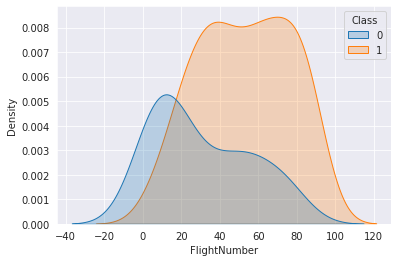

In [28]:
sns.kdeplot(x = 'FlightNumber', hue = 'Class', data=df, fill = True)
plt.show()

In [7]:
# flights 40 - 60 vs flights 0-30 and 61-90
flights4060 = df.loc[(df['FlightNumber'] > 39) & (df['FlightNumber'] < 61)]
flights030 = df.loc[(df['FlightNumber'] > 0) & (df['FlightNumber'] <= 60)]
flights6190 = df.loc[(df['FlightNumber'] > 60) & (df['FlightNumber'] <= 90)]
flightsnon4060 = pd.concat([flights030, flights6190], ignore_index=True)

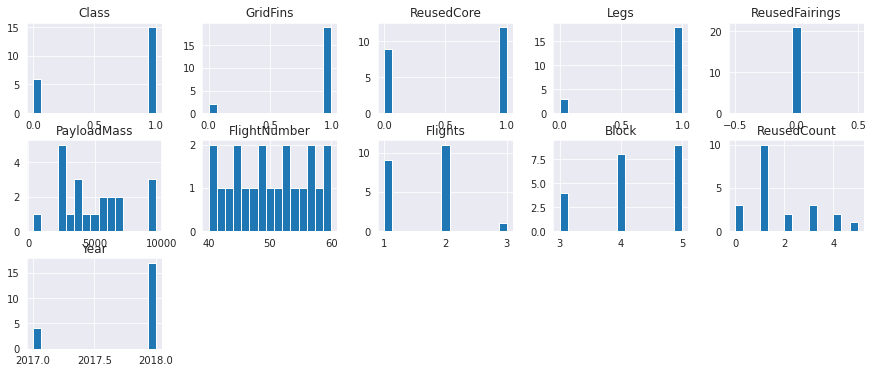

In [56]:
flights4060.hist(bins=15, figsize=(15, 6), layout=(3,5));

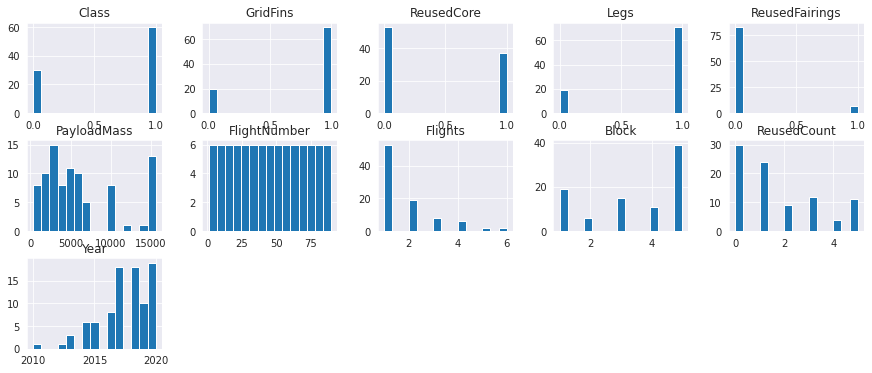

In [57]:
flightsnon4060.hist(bins=15, figsize=(15, 6), layout=(3,5));

In [58]:
flights4060.describe(include = 'object')

,Orbit,LaunchSite,Date,Serial
count,21,21,21,21
unique,6,3,21,16
top,GTO,CCAFS SLC 40,10/11/2017,B1046
freq,10,12,1,3


In [59]:
flightsnon4060.describe(include = 'object')

,Orbit,LaunchSite,Date,Serial
count,90,90,90,90
unique,11,3,90,53
top,GTO,CCAFS SLC 40,6/4/2010,B1049
freq,27,55,1,6


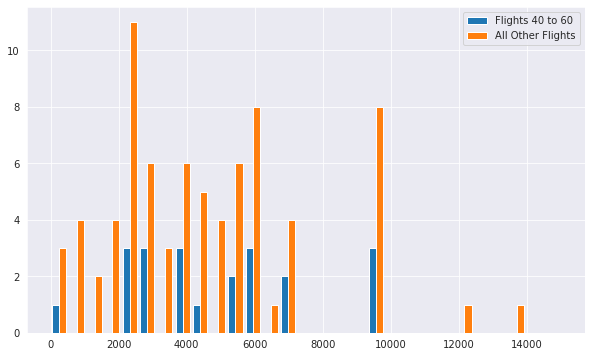

In [16]:
x = flights4060['PayloadMass']
y = flightsnon4060['PayloadMass']
bins = np.linspace(0, 15000, 30)
plt.figure(figsize=(10,6))
plt.hist([x, y], bins, label=['Flights 40 to 60', 'All Other Flights'])
plt.legend(loc='upper right')
plt.show()

In [65]:
flights4060['Orbit'].value_counts()/21*100

GTO    47.619048
ISS    19.047619
PO     14.285714
SSO     9.523810
LEO     4.761905
HEO     4.761905
Name: Orbit, dtype: float64

In [66]:
flightsnon4060['Orbit'].value_counts()/69*100

GTO      39.130435
ISS      30.434783
VLEO     20.289855
PO       13.043478
LEO      10.144928
SSO       7.246377
MEO       4.347826
ES-L1     1.449275
HEO       1.449275
SO        1.449275
GEO       1.449275
Name: Orbit, dtype: float64

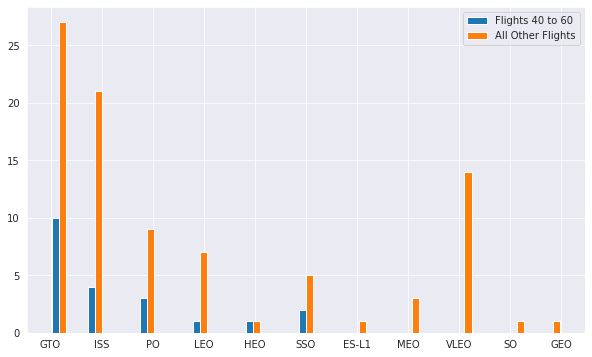

In [18]:
x = flights4060['Orbit']
y = flightsnon4060['Orbit']
bins = np.linspace(0, 10, 30)
plt.figure(figsize=(10,6))
plt.hist([x, y], bins, label=['Flights 40 to 60', 'All Other Flights'])
plt.legend(loc='upper right')
plt.show()

In [85]:
flights4060['Block'].value_counts()/21*100

5    42.857143
4    38.095238
3    19.047619
Name: Block, dtype: float64

In [86]:
flightsnon4060['Block'].value_counts()/69*100

5    56.521739
1    27.536232
3    21.739130
4    15.942029
2     8.695652
Name: Block, dtype: float64

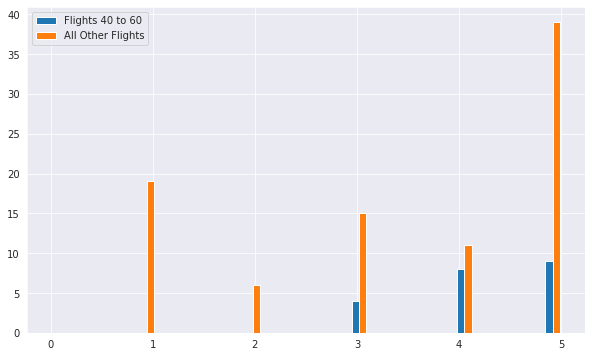

In [23]:
x = flights4060['Block']
y = flightsnon4060['Block']
bins = np.linspace(0, 5, 30)
plt.figure(figsize=(10,6))
plt.hist([x, y], bins, label=['Flights 40 to 60', 'All Other Flights'])
plt.legend(loc='upper left')
plt.show()

flights 40 - 60 vs flights 0-30 and 61-90
* ReusedCore: ~12 vs ~40 / Non-ReusedCore: ~8 vs ~50
* ReusedFairings: 0 vs ~5
* PayloadMass >or= 10,000: 3 vs ~31 / PayloadMass most between 2500-7500 vs 0-7500
* Flights >1: ~12 vs ~ 32
* Blocks:   Block 4: 38.08 vs 15.94 / block 5: 42.86 vs 56.52
* ReusedCount: 0: 3 vs 30, 1: 10 vs 35, 2+: 8 vs. 33
* Orbit % to: GTO  47.6 vs 39.13 / ISS 19.05 vs 30.43 / VLEO 0 vs 20.29 / LEO 4.76 vs 10.14

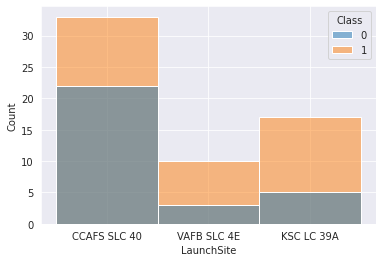

In [27]:
sns.histplot(x = 'LaunchSite', hue = 'Class', data=df, fill = True)
plt.show()

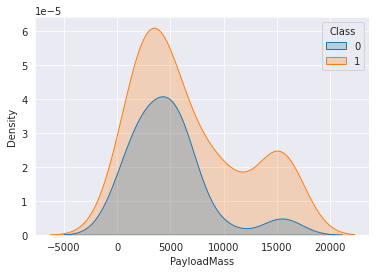

In [26]:
sns.kdeplot(x = 'PayloadMass', hue = 'Class', data=df, fill = True)
plt.show()

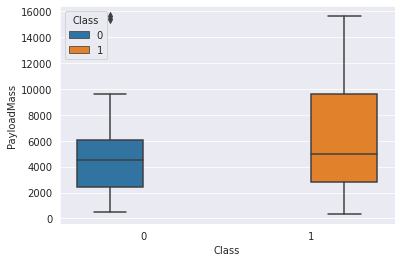

In [43]:
sns.boxplot(y = 'PayloadMass', x = "Class", hue = 'Class', data=df)
plt.show()

In [10]:
payloadmass02500 = df.loc[(df['PayloadMass'] > 0) & (df['PayloadMass'] <= 2500)]
payloadmass25005000 = df.loc[(df['PayloadMass'] > 2500) & (df['PayloadMass'] <= 5000)]
payloadmass50007500 = df.loc[(df['PayloadMass'] > 5000) & (df['PayloadMass'] <= 7500)]
payloadmass750010000 = df.loc[(df['PayloadMass'] > 7500) & (df['PayloadMass'] <= 10000)]
payloadmass10000plus = df.loc[(df['PayloadMass'] > 10000)]

payloadmass02500['MassRange'] = '0 to 2500'
payloadmass25005000['MassRange'] = '2500 to 5000'
payloadmass50007500['MassRange'] = '5000 to 7500'
payloadmass750010000['MassRange'] = '7500 to 10000'
payloadmass10000plus['MassRange'] = '10000 plus'

dfmassrange = pd.concat([payloadmass02500, payloadmass25005000, payloadmass50007500, payloadmass750010000, payloadmass10000plus], ignore_index=True)

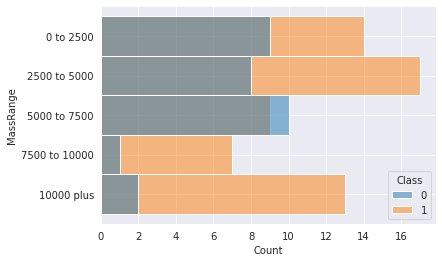

In [83]:
sns.histplot(y = 'MassRange', hue = 'Class', data=dfmassrange)
plt.show()

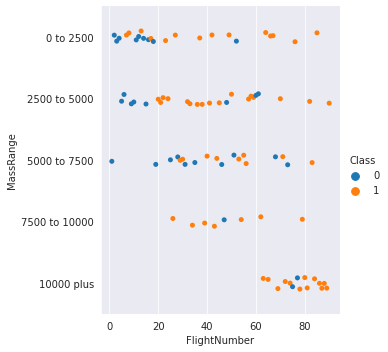

In [84]:
sns.catplot(x = 'FlightNumber', y = 'MassRange', hue = 'Class', data=dfmassrange)
plt.show()

In [15]:
tmp = dfmassrange.groupby(['MassRange'])['Block'].value_counts()/90*100
tmp

MassRange      Block
0 to 2500      1        13.333333
               5         5.555556
               3         3.333333
               4         2.222222
               2         1.111111
10000 plus     5        16.666667
2500 to 5000   5        10.000000
               1         5.555556
               2         4.444444
               4         4.444444
               3         3.333333
5000 to 7500   5         7.777778
               3         6.666667
               4         3.333333
               1         2.222222
               2         1.111111
7500 to 10000  3         3.333333
               5         3.333333
               4         2.222222
Name: Block, dtype: float64

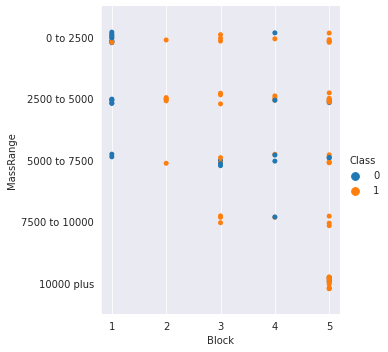

In [115]:
sns.catplot(x = 'Block', y = 'MassRange', hue = 'Class', data=dfmassrange)
plt.show()

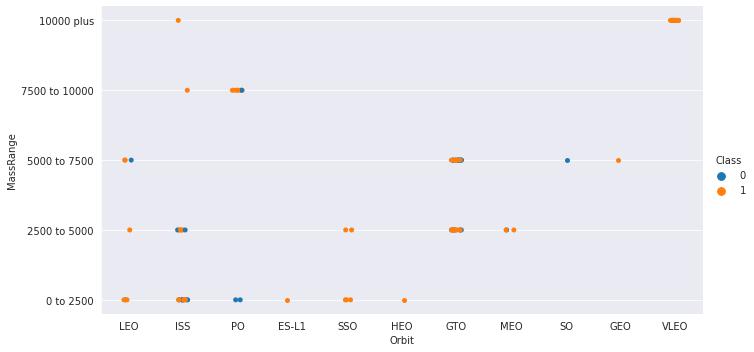

In [106]:
sns.catplot(x = 'Orbit', y = 'MassRange', hue = 'Class', data=dfmassrange, ci = None, height=5, aspect=2)
plt.show()

In [14]:
t = dfmassrange.groupby(['MassRange'])['Orbit'].value_counts()/90*100
t

MassRange      Orbit
0 to 2500      ISS      14.444444
               LEO       3.333333
               SSO       3.333333
               PO        2.222222
               ES-L1     1.111111
               HEO       1.111111
10000 plus     VLEO     15.555556
               ISS       1.111111
2500 to 5000   GTO      14.444444
               ISS       6.666667
               MEO       3.333333
               SSO       2.222222
               LEO       1.111111
5000 to 7500   GTO      15.555556
               LEO       3.333333
               GEO       1.111111
               SO        1.111111
7500 to 10000  PO        7.777778
               ISS       1.111111
Name: Orbit, dtype: float64

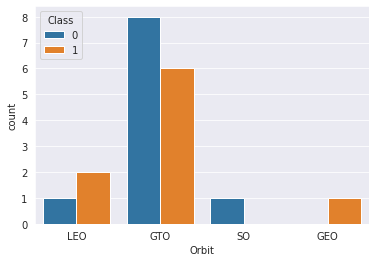

In [114]:
sns.countplot(x = 'Orbit', hue = 'Class', data=payloadmass50007500)
plt.show()

Payload Mass by Mass Category:
* 0 - 2500: 2nd most successful landings vs other ranges, high failure:success ratio, many flights < flight number 20
* 2500 - 5000: most successful landings vs other ranges, high failure: success ratio, many flights < flight number 20
* 5000 - 7500: more failures (10) than successes (9), most failures of all ranges, 2 flights/failures < flight number 20, but failures sprinkled across all flight numbers
* 7500 - 10000: high success to failure ratio, flight numbers all >20
* 10000 plus: high success to failure ratio, flight numbers all > 60

* 5000 - 7500: failures across all blocks with the exception of block 2, GTO was its most common Orbit, 0 ISS and 0 VLEO flights, failures were more common than success with GTO

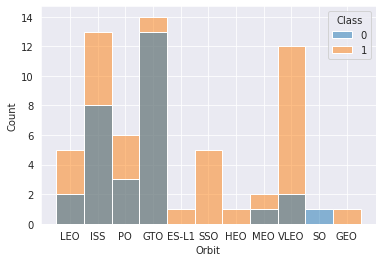

In [25]:
sns.histplot(x = 'Orbit', hue = 'Class', data=df, fill = True)
plt.show()

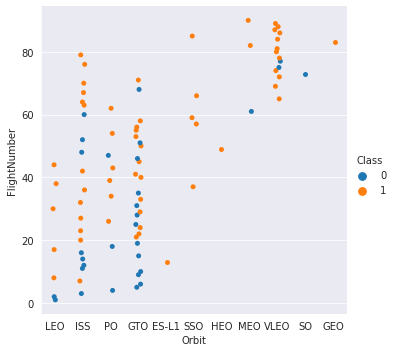

In [132]:
sns.catplot(x = 'Orbit', y = 'FlightNumber', hue = 'Class', data=df)
plt.show()

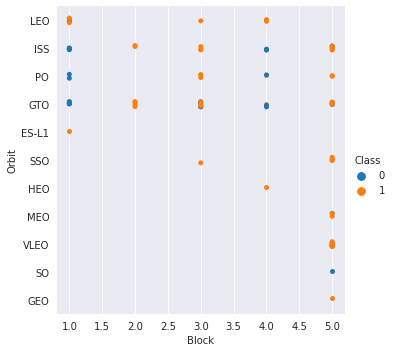

In [135]:
sns.catplot(x = 'Block', y = 'Orbit', hue = 'Class', data=df)
plt.show()

In [137]:
temp = df.groupby(['Orbit', 'Block'])['Block'].value_counts()
temp

Orbit  Block  Block
ES-L1  1      1         1
GEO    5      5         1
GTO    1      1         6
       2      2         4
       3      3         7
       4      4         3
       5      5         7
HEO    4      4         1
ISS    1      1         6
       2      2         2
       3      3         3
       4      4         3
       5      5         7
LEO    1      1         4
       3      3         1
       4      4         2
MEO    5      5         3
PO     1      1         2
       3      3         3
       4      4         2
       5      5         2
SO     5      5         1
SSO    3      3         1
       5      5         4
VLEO   5      5        14
Name: Block, dtype: int64

In [24]:
u = df.groupby(['Orbit', 'Block'])['Class'].mean().reset_index(name = 'success_rate')
u

,Orbit,Block,success_rate
0,ES-L1,1,1.000000
1,GEO,5,1.000000
2,GTO,1,0.000000
3,GTO,2,1.000000
4,GTO,3,0.428571
5,GTO,4,0.333333
6,GTO,5,0.857143
7,HEO,4,1.000000
8,ISS,1,0.166667
9,ISS,2,1.000000


In [23]:
u = df.groupby(['Orbit', 'Block'])['Class'].mean().reset_index(name = 'success_rate')
fouru = u[u['Block'] == 4]
fouru

,Orbit,Block,success_rate
5,GTO,4,0.333333
7,HEO,4,1.000000
11,ISS,4,0.333333
15,LEO,4,1.000000
19,PO,4,0.500000


Orbits
* GTO: most successful landings, and most failed landings (14 vs 13)
* ISS: 2nd most successful landings, 2nd most failed landings (13 vs 8)
* VLEO: 3rd most successful landings, low failure count (12 vs 2)
* PO, LEO, SSO also have 5+ successful landings
* Overtime: GTO and ISS have improved, but failures sprinkled throughout flight number range
* Blocks: GTO and ISS seem to have most issues with block 1 and 4, the following Orbits have had flights using block 4: GTO 3, ISS 3, LEO 2, PO 2, HEO 1, other orbits had no flights with block 4

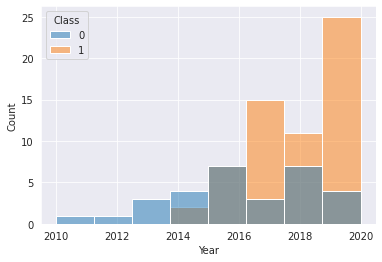

In [31]:
sns.histplot(x = 'Year', hue = 'Class', data=df, fill = True)
plt.show()

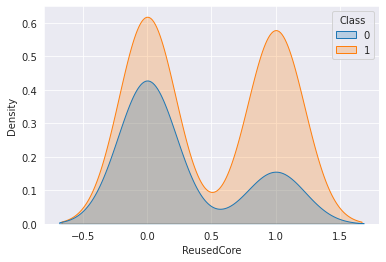

In [137]:
sns.kdeplot(x = 'ReusedCore', hue = 'Class', data=df, fill = True)
plt.show()

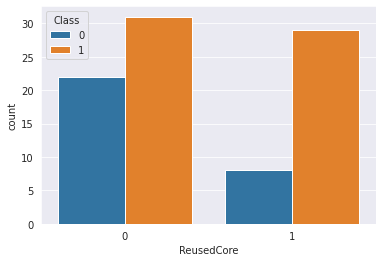

In [139]:
sns.countplot(x = 'ReusedCore', hue = 'Class', data=df)
plt.show()

ReusedCore
* Core reuse does not appear to affect landing success, as distribution of success is only slightly less with reuse, distribution of failure is much less with reuse

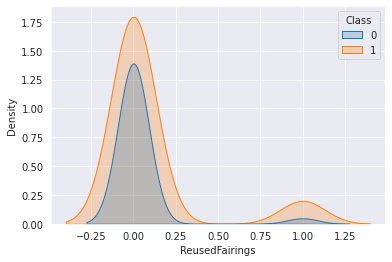

In [138]:
sns.kdeplot(x = 'ReusedFairings', hue = 'Class', data=df, fill = True)
plt.show()

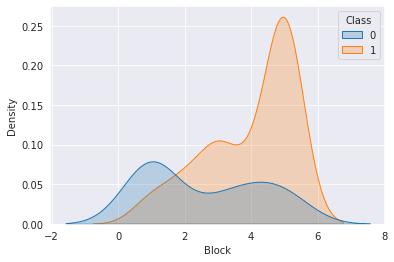

In [140]:
sns.kdeplot(x = 'Block', hue = 'Class', data=df, fill = True)
plt.show()

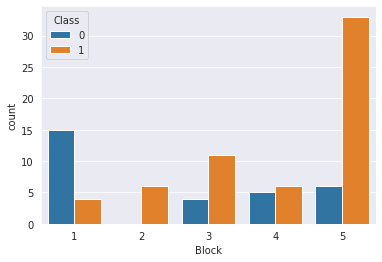

In [153]:
sns.countplot(x = 'Block', hue = 'Class', data=df)
plt.show()

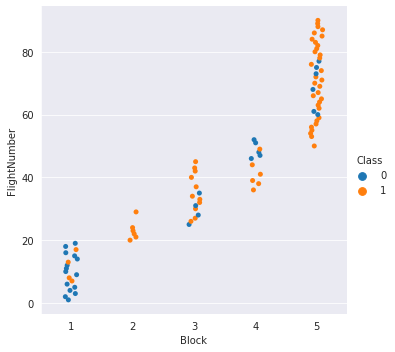

In [152]:
sns.catplot(x = 'Block', y = 'FlightNumber', hue = 'Class', data=df)
plt.show()

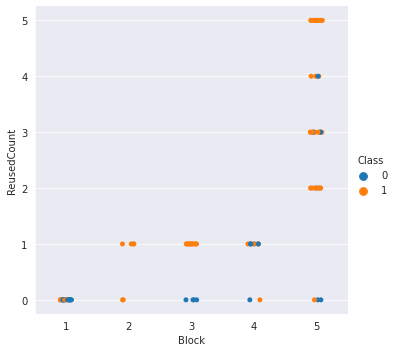

In [158]:
sns.catplot(x = 'Block', y = 'ReusedCount', hue = 'Class', data=df)
plt.show()

Blocks
* distribution of successful landings: peak at block 5, with a trough at block 4
* distribution of failed landings: peak at block 2, with secondary peak at block 4
* block 5: highest success to failure ratio (~33:6)
* block 1: highest failure to success ratio (~4:15)
* block 4: success to failure ratio (6:4) 
* block 4: relatively short period of use from flight number 35 to 50, failures in later flights
* block 4: ReuseCount, subsequent flights appear to have more failures compared to other blocks, which have a reversed pattern of success on reuse

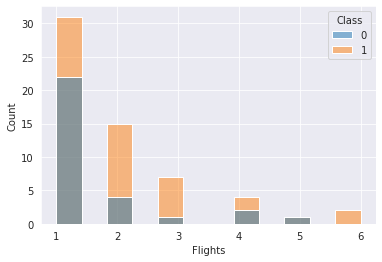

In [163]:
sns.histplot(x = 'Flights', hue = 'Class', data=df)
plt.show()

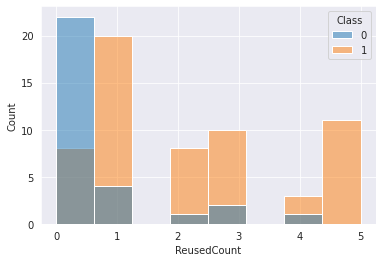

In [162]:
sns.histplot(x = 'ReusedCount', hue = 'Class', data=df)
plt.show()

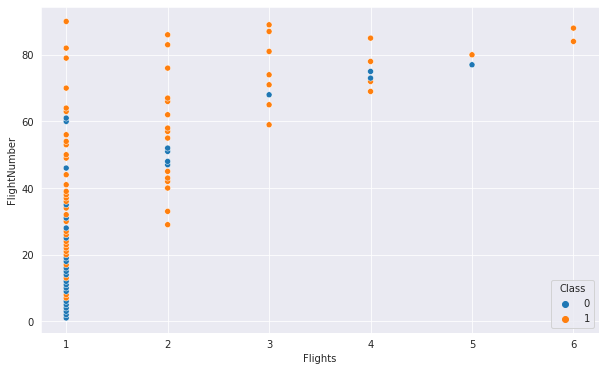

In [145]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Flights', y = 'FlightNumber', hue = 'Class', data=df)
plt.show()

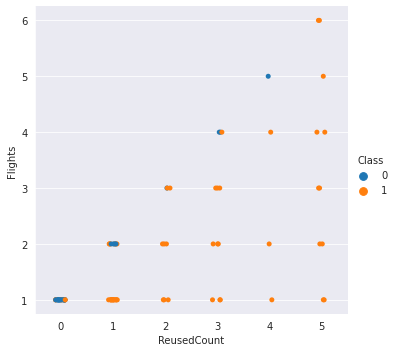

In [166]:
sns.catplot(x = 'ReusedCount', y = 'Flights', hue = 'Class', data=df)
plt.show()

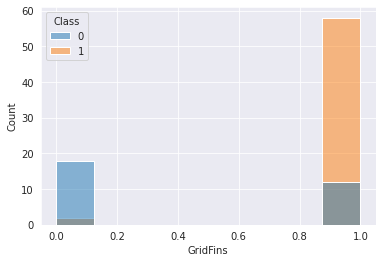

In [29]:
sns.histplot(x = 'GridFins', hue = 'Class', data=df, fill = True)
plt.show()

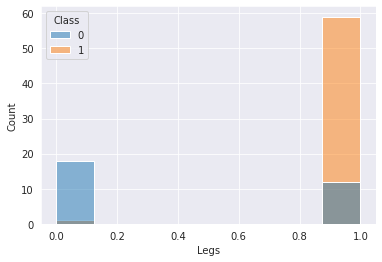

In [30]:
sns.histplot(x = 'Legs', hue = 'Class', data=df, fill = True)
plt.show()

In [170]:
NoGridFinsOutcome = data[data['GridFins'] == False].groupby('Outcome')['GridFins'].count()
NoLegsOutcome = data[data['Legs'] == False].groupby('Outcome')['Legs'].count()
print(NoGridFinsOutcome, NoLegsOutcome)

Outcome
False Ocean     2
None None      16
True Ocean      2
Name: GridFins, dtype: int64 Outcome
False Ocean     2
None None      16
True Ocean      1
Name: Legs, dtype: int64


Legs and GridFins
* Success without Legs/GridFins = 'True Ocean' = controlled landing into the ocean, early test flights
* Not equipt with Legs/GridFins = 'None None' = landing not attempted, landing attempt not planned upon
* presence of legs and gridfins reveals intention of the mission: do we plan to land or not

In [171]:
# encode nominal variables
from sklearn import preprocessing

In [172]:
le = preprocessing.LabelEncoder()
(df['LaunchSite']) = le.fit_transform(df['LaunchSite'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
# key: {'CCAFS SLC 40': 0, 'KSC LC 39A': 1, 'VAFB SLC 4E': 2}

{'CCAFS SLC 40': 0, 'KSC LC 39A': 1, 'VAFB SLC 4E': 2}


In [173]:
(df['Orbit']) = le.fit_transform(df['Orbit'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
# key: {'ES-L1': 0, 'GEO': 1, 'GTO': 2, 'HEO': 3, 'ISS': 4, 'LEO': 5, 'MEO': 6, 'PO': 7, 'SO': 8, 'SSO': 9, 'VLEO': 10}

{'ES-L1': 0, 'GEO': 1, 'GTO': 2, 'HEO': 3, 'ISS': 4, 'LEO': 5, 'MEO': 6, 'PO': 7, 'SO': 8, 'SSO': 9, 'VLEO': 10}


In [174]:
(df['Serial']) = le.fit_transform(df['Serial'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
# key: {'B0003': 0, 'B0005': 1, 'B0007': 2, 'B1003': 3, 'B1004': 4, 'B1005': 5, 'B1006': 6, 'B1007': 7, 'B1008': 8, 
##'B1010': 9, 'B1011': 10, 'B1012': 11, 'B1013': 12, 'B1015': 13, 'B1016': 14, 'B1017': 15, 'B1018': 16, 'B1019': 17, 
##'B1020': 18, 'B1021': 19, 'B1022': 20, 'B1023': 21, 'B1025': 22, 'B1026': 23, 'B1028': 24, 'B1029': 25, 'B1030': 26, 
##'B1031': 27, 'B1032': 28, 'B1034': 29, 'B1035': 30, 'B1036': 31, 'B1037': 32, 'B1038': 33, 'B1039': 34, 'B1040': 35, 
##'B1041': 36, 'B1042': 37, 'B1043': 38, 'B1044': 39, 'B1045': 40, 'B1046': 41, 'B1047': 42, 'B1048': 43, 'B1049': 44, 
##'B1050': 45, 'B1051': 46, 'B1054': 47, 'B1056': 48, 'B1058': 49, 'B1059': 50, 'B1060': 51, 'B1062': 52}

{'B0003': 0, 'B0005': 1, 'B0007': 2, 'B1003': 3, 'B1004': 4, 'B1005': 5, 'B1006': 6, 'B1007': 7, 'B1008': 8, 'B1010': 9, 'B1011': 10, 'B1012': 11, 'B1013': 12, 'B1015': 13, 'B1016': 14, 'B1017': 15, 'B1018': 16, 'B1019': 17, 'B1020': 18, 'B1021': 19, 'B1022': 20, 'B1023': 21, 'B1025': 22, 'B1026': 23, 'B1028': 24, 'B1029': 25, 'B1030': 26, 'B1031': 27, 'B1032': 28, 'B1034': 29, 'B1035': 30, 'B1036': 31, 'B1037': 32, 'B1038': 33, 'B1039': 34, 'B1040': 35, 'B1041': 36, 'B1042': 37, 'B1043': 38, 'B1044': 39, 'B1045': 40, 'B1046': 41, 'B1047': 42, 'B1048': 43, 'B1049': 44, 'B1050': 45, 'B1051': 46, 'B1054': 47, 'B1056': 48, 'B1058': 49, 'B1059': 50, 'B1060': 51, 'B1062': 52}


In [175]:
df.head()

,Class,GridFins,ReusedCore,Legs,ReusedFairings,PayloadMass,FlightNumber,Flights,Block,ReusedCount,Year,Orbit,LaunchSite,Date,Serial
0,0,0,0,0,0,6104.959412,1,1,1,0,2010,5,0,6/4/2010,0
1,0,0,0,0,0,525.000000,2,1,1,0,2012,5,0,5/22/2012,1
2,0,0,0,0,0,677.000000,3,1,1,0,2013,4,0,3/1/2013,2
3,0,0,0,0,0,500.000000,4,1,1,0,2013,7,2,9/29/2013,3
4,0,0,0,0,0,3170.000000,5,1,1,0,2013,2,0,12/3/2013,4


In [176]:
corr = df.corr()
corr

,Class,GridFins,ReusedCore,Legs,ReusedFairings,PayloadMass,FlightNumber,Flights,Block,ReusedCount,Year,Orbit,LaunchSite,Serial
Class,1.000000,0.642540,0.207582,0.673825,0.117343,0.199992,0.401923,0.149787,0.416015,0.466584,0.433912,0.217868,0.160706,0.446388
GridFins,0.642540,1.000000,0.229341,0.902302,0.155230,0.258011,0.442364,0.194457,0.438023,0.410324,0.533011,0.255073,0.170075,0.514921
ReusedCore,0.207582,0.229341,1.000000,0.155552,0.347574,0.468393,0.635844,0.782631,0.548036,0.594109,0.596902,0.447418,0.069799,0.514704
Legs,0.673825,0.902302,0.155552,1.000000,0.150230,0.192318,0.373619,0.157727,0.368994,0.375496,0.463215,0.232126,0.079205,0.432497
ReusedFairings,0.117343,0.155230,0.347574,0.150230,1.000000,0.581760,0.392047,0.635427,0.274592,0.400328,0.332867,0.489949,0.015086,0.261933
PayloadMass,0.199992,0.258011,0.468393,0.192318,0.581760,1.000000,0.596307,0.665218,0.518165,0.612327,0.565645,0.620666,0.091554,0.501986
FlightNumber,0.401923,0.442364,0.635844,0.373619,0.392047,0.596307,1.000000,0.652842,0.932411,0.735193,0.950042,0.527407,0.027411,0.953043
Flights,0.149787,0.194457,0.782631,0.157727,0.635427,0.665218,0.652842,1.000000,0.519603,0.684802,0.593286,0.639145,-0.023444,0.478061
Block,0.416015,0.438023,0.548036,0.368994,0.274592,0.518165,0.932411,0.519603,1.000000,0.743340,0.907405,0.429891,0.133712,0.969474
ReusedCount,0.466584,0.410324,0.594109,0.375496,0.400328,0.612327,0.735193,0.684802,0.743340,1.000000,0.704688,0.577395,0.138384,0.689236


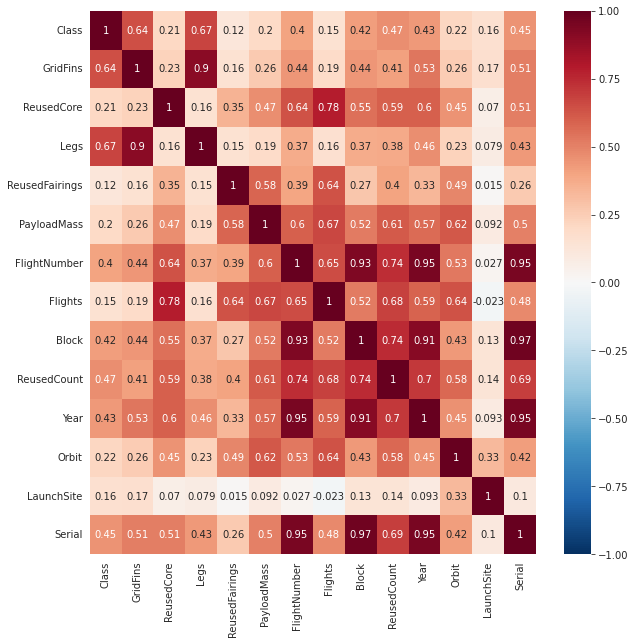

In [178]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

Relationship between GTO, ISS, VLEO, LEO, B4, B5 and Landing Class Outcome

In [5]:
s = pd.read_csv('/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_encoded.csv')

In [61]:
sGTOy = s.loc[(s['Orbit'] == 'GTO')]
sGTOn = s.loc[(s['Orbit'] != 'GTO')]
sGTOy['GTO'] = 1
sGTOn['GTO'] = 0
sGTO = pd.concat([sGTOy, sGTOn], ignore_index = True)
sGTO = sGTO.sort_values(by = ['FlightNumber'], ascending = [True])
sGTO = sGTO.reset_index()
sGTO = sGTO.drop('index', axis = 1)

sISSy = s.loc[(s['Orbit'] == 'ISS')]
sISSn = s.loc[(s['Orbit'] != 'ISS')]
sISSy['ISS'] = 1
sISSn['ISS'] = 0
sISS = pd.concat([sISSy, sISSn], ignore_index = True)
sISS = sISS.sort_values(by = ['FlightNumber'], ascending = [True])
sISS = sISS.reset_index()
sISS = sISS.drop('index', axis = 1)

sVLEOy = s.loc[(s['Orbit'] == 'VLEO')]
sVLEOn = s.loc[(s['Orbit'] != 'VLEO')]
sVLEOy['VLEO'] = 1
sVLEOn['VLEO'] = 0
sVLEO = pd.concat([sVLEOy, sVLEOn], ignore_index = True)
sVLEO = sVLEO.sort_values(by = ['FlightNumber'], ascending = [True])
sVLEO = sVLEO.reset_index()
sVLEO = sVLEO.drop('index', axis = 1)

sLEOy = s.loc[(s['Orbit'] == 'LEO')]
sLEOn = s.loc[(s['Orbit'] != 'LEO')]
sLEOy['LEO'] = 1
sLEOn['LEO'] = 0
sLEO = pd.concat([sLEOy, sLEOn], ignore_index = True)
sLEO = sLEO.sort_values(by = ['FlightNumber'], ascending = [True])
sLEO = sLEO.reset_index()
sLEO = sLEO.drop('index', axis = 1)

sB4y = s.loc[(s['Block'] == 4)]
sB4n = s.loc[(s['Block'] != 4)]
sB4y['B4'] = 1
sB4n['B4'] = 0
sB4 = pd.concat([sB4y, sB4n], ignore_index = True)
sB4 = sB4.sort_values(by = ['FlightNumber'], ascending = [True])
sB4 = sB4.reset_index()
sB4 = sB4.drop('index', axis = 1)

sB5y = s.loc[(s['Block'] == 5)]
sB5n = s.loc[(s['Block'] != 5)]
sB5y['B5'] = 1
sB5n['B5'] = 0
sB5 = pd.concat([sB5y, sB5n], ignore_index = True)
sB5 = sB5.sort_values(by = ['FlightNumber'], ascending = [True])
sB5 = sB5.reset_index()
sB5 = sB5.drop('index', axis = 1)

In [77]:
from functools import reduce

#define list of DataFrames
ss = [sGTO, sISS, sVLEO, sLEO, sB4, sB5]

#merge all DataFrames into one
s2 = reduce(lambda  left,right: pd.merge(left,right,on=['Class', 'FlightNumber', 'GridFins', 'ReusedCore', 'Legs',
       'ReusedFairings', 'PayloadMass', 'Flights', 'Block',
       'ReusedCount', 'Year', 'Orbit', 'LaunchSite', 'Date',
       'Serial'], how='outer'), ss)
#view merged DataFrame
print(s.shape, s2.shape, s2.columns)

(90, 15) (90, 21) Index(['Class', 'GridFins', 'ReusedCore', 'Legs', 'ReusedFairings',
       'PayloadMass', 'FlightNumber', 'Flights', 'Block', 'ReusedCount',
       'Year', 'Orbit', 'LaunchSite', 'Date', 'Serial', 'GTO', 'ISS', 'VLEO',
       'LEO', 'B4', 'B5'],
      dtype='object')


In [80]:
s2

,Class,GridFins,ReusedCore,Legs,ReusedFairings,PayloadMass,FlightNumber,Flights,Block,ReusedCount,...,Orbit,LaunchSite,Date,Serial,GTO,ISS,VLEO,LEO,B4,B5
0,0,0,0,0,0,6104.959412,1,1,1,0,...,LEO,CCAFS SLC 40,6/4/2010,B0003,0,0,0,1,0,0
1,0,0,0,0,0,525.000000,2,1,1,0,...,LEO,CCAFS SLC 40,5/22/2012,B0005,0,0,0,1,0,0
2,0,0,0,0,0,677.000000,3,1,1,0,...,ISS,CCAFS SLC 40,3/1/2013,B0007,0,1,0,0,0,0
3,0,0,0,0,0,500.000000,4,1,1,0,...,PO,VAFB SLC 4E,9/29/2013,B1003,0,0,0,0,0,0
4,0,0,0,0,0,3170.000000,5,1,1,0,...,GTO,CCAFS SLC 40,12/3/2013,B1004,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,1,1,1,0,15400.000000,86,2,5,2,...,VLEO,KSC LC 39A,9/3/2020,B1060,0,0,1,0,0,1
86,1,1,1,1,1,15400.000000,87,3,5,2,...,VLEO,KSC LC 39A,10/6/2020,B1058,0,0,1,0,0,1
87,1,1,1,1,1,15400.000000,88,6,5,5,...,VLEO,KSC LC 39A,10/18/2020,B1051,0,0,1,0,0,1
88,1,1,1,1,0,15400.000000,89,3,5,2,...,VLEO,CCAFS SLC 40,10/24/2020,B1060,0,0,1,0,0,1


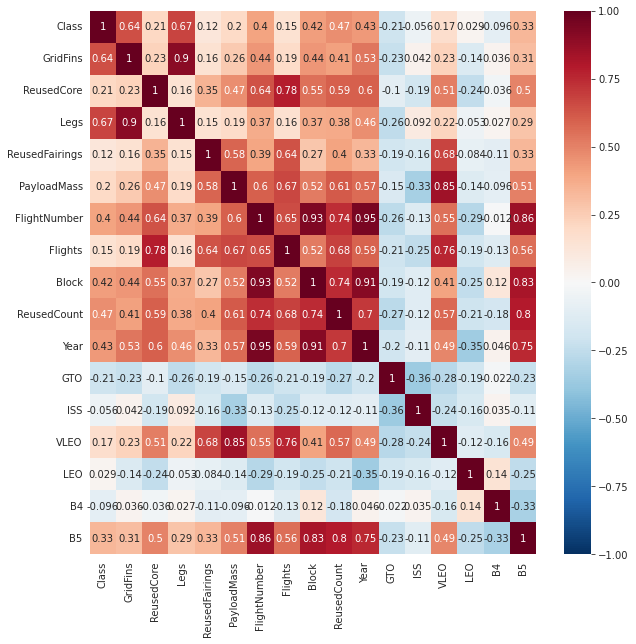

In [81]:
scorr = s2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(scorr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

Correlation
The magnitude or strength of correlation can be classified as:
* very strong 0.99
* strong 0.75
* moderate 0.56
* weak 0.21 
* no relationship 0.04
* positive + relationship
* negative - inverse relationship

GTO, ISS, VLEO, LEO, B4, B5 vs. Class of Landing Outcome
* GTO - weak -
* ISS - no relationship
* VLEO - no relationship
* LEO - no relationship
* B4 - no relationship
* B5 - weak +

Strong Relationships vs. Class
* None

Moderate Relationships vs. Class
* Legs
* GridFins

Weak Relationships vs. Class
* ReusedCore
* PayloadMass
* FlightNumber
* Block
* ReusedCount
* Year
* B5
* GTO

Redundant Data
* Year - FlightNumber - Block
* Legs - GridFins

... See Notebook 8b

In [96]:
df.to_csv('spacex_encoded.csv', index=False)
corr.to_csv('spacex_correlation.csv', index=False)
cost_df.to_csv('spacex_financials.csv', index=False)
s2.to_csv('spacex_extra_correlation.csv', index=False)